# Functions testing

In [1]:
import functions_training_pipeline as f
from functions_training_pipeline import Model

In [2]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

### saving functions, to be updated

In [3]:
# def save_prediction_tif(X_pred, y_predicted, path_out):
#     """
#     Function to write predictions to .tif.
#     Arguments:
#         X_pred: data to be predicted on.
#         y_predicted: predicted labels in array, or pandas series.
#         path_out: path to save .tif file with file name.
#     Returns: No return, writes data to path.
#     """
#     # join prediction and coordinates (row, col)
#     X_pred["prediction"] = y_predicted

#     # original matrix shape:
#     nan_matrix = np.full((2663, 1462), np.nan)

#     for row in tqdm(X_pred.iterrows()):  # fix progress bar?
#         row_index = int(row[1]["row"])
#         col_index = int(row[1]["col"])
#         pred_val = row[1]["prediction"]
#         nan_matrix[row_index][col_index] = pred_val

#     # file to take reference metadata from is interpolated transformed file
#     path_metadata_reference = r"../Data/microwave-rs/mw_interpolated/2019-07-01_mw.tif"

#     convert_to_tif(nan_matrix, path_metadata_reference, path_out)

#     return


# def convert_to_tif(data, path_file_metadata, path_out):
#     """
#     Function to convert data to tif file.
#     Arguments:
#         data: new file
#         path_file_metadata: tif file with metadata matching expected output tif file
#         path_out: output tif file destination and name path
#     Returns:
#         .tif file
#     """
#     with rasterio.open(path_file_metadata) as src:
#         kwargs1 = src.meta.copy()

#     with rasterio.open(path_out, "w", **kwargs1) as dst:
#         dst.write_band(1, data)  # numpy array or xarray
#     return

### Test pipeline

**Test:**
- ~~test~~
- ~~different dates~~
- ~~differnt columns~~
- ~~different models~~
- ~~with and wo normalization~~
- test removal for prediction

In [4]:
df_path = r"../../AWS_Data/Data/dataframe_extended/"

In [3]:
# path to my hard drive (Nina)
df_path = r"D:/MasterThesis/dataframe_extended/"

all columns = 'x', 'y', 'mw_value', 'opt_value', 'date',
       'col', 'row', 'mean_3', 'mean_9',
       'sum_5', 'mw_value_yesterday', 'mw_value_7_day_average',
       'hours_of_daylight', 'elevation_data', 'slope_data', 'aspect_data',
       'distance_to_margin'

required columns = 'x', 'y', 'mw_value', 'opt_value', 'date'.

#### V1 (random forest)

In [4]:
from sklearn.ensemble import RandomForestRegressor

date_from = '2017-05-01'
date_to = '2017-05-02'

data = f.import_data(date_from, date_to, df_path)
data = f.remove_data(data, removeMaskedClouds = True, removeNoMelt = True) 
data = f.data_normalization(data, data.columns)

columns = ['x', 'y', 'mw_value',  'col', 'row'] # 'opt_value', 'date',

100%|██████████| 2/2 [00:02<00:00,  1.31s/it]


Not applicable for feature'mw_value'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


In [8]:
rf = f.Model(model = RandomForestRegressor, name = 'RF_test_04_22')
rf.date_tested = '2023-04-22' # optional
rf.columns = columns # optional
hyperparameters_for_grid = {'n_estimators': [10, 20], 'max_depth':[4]}
rf.hyperparameters = rf.create_hyperparameter_grid(hyperparameters_for_grid)

In [9]:
rf.hyperparameters

[{'max_depth': 4, 'n_estimators': 10}, {'max_depth': 4, 'n_estimators': 20}]

In [10]:
%%time
rf.spatial_cv(data, columns)

CPU times: user 27min 41s, sys: 11.5 s, total: 27min 53s
Wall time: 27min 33s


In [17]:
f.save_object(rf)

In [30]:
rf_test = f.load_object("RF_test_2023_04_17")

In [57]:
rf_test.final_model.predict(data[rf_test.columns])

array([0.25233576, 0.25233576, 0.25233576, ..., 0.2452713 , 0.2452713 ,
       0.2452713 ])

In [31]:
rf_test.best_hyperparameter_list

[{'max_depth': 4, 'n_estimators': 10},
 {'max_depth': 4, 'n_estimators': 10},
 {'max_depth': 4, 'n_estimators': 10},
 {'max_depth': 4, 'n_estimators': 10},
 {'max_depth': 4, 'n_estimators': 10}]

#### V2 (xgboost)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

date_from = '2018-10-07'
date_to = '2018-10-11'

data = f.import_data(date_from, date_to, df_path)
data = f.remove_data(data, removeMaskedClouds = True, removeNoMelt = True) 
data = f.data_normalization(data, data.columns)

columns = ['x', 'y', 'mw_value',  'mean_3', 'mean_9'] # 'opt_value', 'date', 

  0%|          | 0/5 [00:00<?, ?it/s]

2018-10-07


 20%|██        | 1/5 [00:00<00:03,  1.19it/s]

file
2018-10-08


 40%|████      | 2/5 [00:01<00:02,  1.18it/s]

file
2018-10-09


 60%|██████    | 3/5 [00:02<00:01,  1.25it/s]

file
2018-10-10


 80%|████████  | 4/5 [00:03<00:00,  1.34it/s]

file
2018-10-11


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

file


Not applicable for feature'mw_value'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


In [ ]:
xgb = f.Model(model = GradientBoostingRegressor, name = 'XGB_test_2023_04_17')
xgb.date_tested = '2023-04-17' # optional
xgb.columns = columns # optional
hyperparameters_for_grid = {'min_samples_split':[3,5], 'learning_rate':[0.1, 0.5]}
xgb.hyperparameters = rf.create_hyperparameter_grid(hyperparameters_for_grid)

In [ ]:
xgb.spatial_cv(data, columns)

In [ ]:
f.save_object(xgb)

In [58]:
xgb_test = f.load_object("XGB_test_2023_04_17")

In [59]:
xgb_test.final_model.predict(data[xgb_test.columns])

array([0.11850426, 0.11850426, 0.11850426, ..., 0.12333049, 0.22347761,
       0.27816202])

#### V3 (linear)

In [17]:
from sklearn.linear_model import LinearRegression

date_from = '2018-06-13'
date_to = '2018-06-15'

data = f.import_data(date_from, date_to, df_path)
data = f.remove_data(data, removeMaskedClouds = True, removeNoMelt = True) 
data = f.data_normalization(data)

columns = ['mw_value', 'sum_5', 'mw_value_yesterday'] # 'x', 'y', 

100%|██████████| 3/3 [00:01<00:00,  1.76it/s]


Not applicable for feature'mw_value'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


In [21]:
columns = ['mw_value', 'sum_5', 'mw_value_yesterday', 'row'] # 'x', 'y', 

In [22]:
lr = f.Model(model = LinearRegression, name = 'LR_test_2023_04_17')
lr.date_tested = '2023-04-17' # optional
hyperparameters_for_grid = {'fit_intercept': [True]}
lr.hyperparameters = lr.create_hyperparameter_grid(hyperparameters_for_grid)

In [23]:
lr.hyperparameters

[{'fit_intercept': True}]

In [24]:
%%time
lr.spatial_cv(data, columns)

Column row should not be included


AssertionError: 

In [15]:
lr.name = 'LR_test_04_22'
lr.date_tested = '2023-04-22'

In [16]:
f.save_object(lr)

In [25]:
lr = f.load_object("LR_test_2023_04_17")

In [27]:
lr.final_model.predict(data[lr.columns])

array([0.29517136, 0.29513615, 0.29587465, ..., 0.3125172 , 0.31247682,
       0.31244977])

#### V4 (ridge)

In [19]:
from sklearn.linear_model import Ridge

date_from = '2019-05-02'
date_to = '2019-05-10'

data = f.import_data(date_from, date_to, df_path)
data = f.remove_data(data, removeMaskedClouds = True, removeNoMelt = True) 
data = f.data_normalization(data, data.columns)

columns = ['x', 'y', 'mw_value', 'mw_value_7_day_average', 'hours_of_daylight'] # 'opt_value', 'date', 

100%|██████████| 9/9 [00:04<00:00,  2.02it/s]


Not applicable for feature'mw_value'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


In [43]:
rid = f.Model(model = Ridge, name = 'RID_test_2023_04_17')
rid.date_tested = '2023-04-17' # optional
rid.columns = columns # optional
hyperparameters_for_grid = {'fit_intercept': [True]}
rid.hyperparameters = rid.create_hyperparameter_grid(hyperparameters_for_grid)

In [44]:
%%time
rr.spatial_cv(data, columns)

CPU times: user 27.8 s, sys: 38.9 s, total: 1min 6s
Wall time: 12.3 s


In [45]:
f.save_object(rid)

#### V5 (lasso)

In [50]:
from sklearn.linear_model import Lasso

date_from = '2017-09-29'
date_to = '2018-05-03'

data = f.import_data(date_from, date_to, df_path)
data = f.remove_data(data, removeMaskedClouds = True, removeNoMelt = True) 
data = f.data_normalization(data, data.columns)

columns = ['x', 'y', 'mw_value', 'elevation_data', "slope_data"] # 'opt_value', 'date', 

100%|██████████| 217/217 [00:02<00:00, 81.83it/s] 


Not applicable for feature'mw_value'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


In [51]:
las = f.Model(model = Lasso, name = 'LAS_test_2023_04_17')
las.date_tested = '2023-04-17' # optional
las.columns = columns # optional
hyperparameters_for_grid = {'fit_intercept': [True], 'alpha': [0.1]}
las.hyperparameters = las.create_hyperparameter_grid(hyperparameters_for_grid)

In [52]:
las.spatial_cv(data, columns)

In [53]:
f.save_object(las)

In [54]:
las.final_model.predict(data[las.columns])

array([0.22977035, 0.22977035, 0.22977035, ..., 0.22977035, 0.22977035,
       0.22977035])

#### V6 (elasticnet)

In [76]:
from sklearn.linear_model import ElasticNet

date_from = '2019-06-10'
date_to = '2019-06-12'

data = f.import_data(date_from, date_to, df_path)
data = f.remove_data(data, removeMaskedClouds = True, removeNoMelt = True) 
#data = f.data_normalization(data, data.columns)

columns = ['x', 'y', 'mw_value', 'aspect_data', "distance_to_margin"] # 'opt_value', 'date', 

100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


In [77]:
elnet = f.Model(model = ElasticNet, name = 'ELNET_test_2023_04_17')
elnet.date_tested = '2023-04-17' # optional
elnet.columns = columns # optional
hyperparameters_for_grid = {'fit_intercept': [True], 'alpha': [0.1]}
elnet.hyperparameters = elnet.create_hyperparameter_grid(hyperparameters_for_grid)

In [78]:
elnet.spatial_cv(data, columns)

In [79]:
f.save_object(elnet)

In [80]:
elnet.final_model.predict(data[elnet.columns])

array([0.53528759, 0.53648661, 0.53424031, ..., 0.92250891, 0.9256646 ,
       0.92413931])

#### V7 (decision tree)

In [69]:
from sklearn.tree import DecisionTreeRegressor

date_from = '2019-07-08'
date_to = '2019-07-09'

data = f.import_data(date_from, date_to, df_path)
data = f.remove_data(data, removeMaskedClouds = True, removeNoMelt = True) 
data = f.data_normalization(data, data.columns)

columns = ['x', 'y', 'mw_value', 'sum_5', 'hours_of_daylight', "slope_data"] # 'opt_value', 'date', 

100%|██████████| 2/2 [00:01<00:00,  1.50it/s]


Not applicable for feature'mw_value'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


In [70]:
dtr = f.Model(model = DecisionTreeRegressor, name = 'DTR_test_2023_04_17')
dtr.date_tested = '2023-04-17' # optional
dtr.columns = columns # optional
hyperparameters_for_grid = {'max_depth': [10], 'splitter': ["best"]}
dtr.hyperparameters = dtr.create_hyperparameter_grid(hyperparameters_for_grid)

In [71]:
dtr.spatial_cv(data, columns)

In [72]:
f.save_object(dtr)

In [73]:
dtr.final_model.predict(data[dtr.columns])

array([0.47092273, 0.15005733, 0.02539315, ..., 0.00303064, 0.00303064,
       0.66024074])

#### Test/compare saved models:


In [ ]:
dt_test = f.load_object()

In [ ]:
dt2.final_model.predict([[55500,700000,1,0.5]])

### Other tests

In [5]:
lr = f.load_object("LR_test_04_22")

In [7]:
lr.cv_model_list[0].get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [6]:
# load test data
xx = f.import_data('2019-08-05', '2019-08-05', df_path)
xx = f.remove_data(xx, removeMaskedClouds = True, removeNoMelt = True) 
xx = f.data_normalization(xx)

100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


In [7]:
xx

,x,y,mw_value,opt_value,col,row,mean_3,mean_9,sum_5,date,mw_value_yesterday,mw_value_7_day_average,hours_of_daylight,elevation_data,slope_data,aspect_data,distance_to_margin
0,0.556468,0.983847,0.0,0.002843,813,43,0.0,0.0,0.0,2019-08-05,0.0,0.0,1.000000,0.210883,0.053036,0.802390,0.081349
1,0.557153,0.983847,0.0,0.003675,814,43,0.0,0.0,0.0,2019-08-05,0.0,0.0,1.000000,0.196264,0.051625,0.912200,0.079572
2,0.556468,0.983471,0.0,0.005672,813,44,0.0,0.0,0.0,2019-08-05,0.0,0.0,1.000000,0.215755,0.040550,0.452965,0.082284
4,0.463381,0.967693,0.0,0.001153,677,86,0.0,0.0,0.0,2019-08-05,0.0,0.0,1.000000,0.059556,0.129619,0.190021,0.059044
12,0.444216,0.963561,0.0,0.004774,649,97,0.0,0.0,0.0,2019-08-05,0.0,0.0,1.000000,0.150244,0.036888,0.999926,0.044088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348994,0.451745,0.042449,0.0,0.721803,660,2549,0.0,0.0,0.0,2019-08-05,0.0,0.0,0.697701,0.414456,0.014434,0.985071,0.123098
1348995,0.452430,0.042449,0.0,0.758615,661,2549,0.0,0.0,0.0,2019-08-05,0.0,0.0,0.697700,0.415539,0.013818,0.983686,0.124264
1348996,0.453114,0.042449,0.0,0.791798,662,2549,0.0,0.0,0.0,2019-08-05,0.0,0.0,0.697700,0.417434,0.016612,0.969335,0.125452
1348997,0.453799,0.042449,0.0,0.759703,663,2549,0.0,0.0,0.0,2019-08-05,0.0,0.0,0.697699,0.420411,0.018394,0.897914,0.126659


In [8]:
tt = f.mean_predict(lr,xx) 

In [9]:
tt[['row', 'col']].duplicated().sum()

0

In [28]:
from tqdm import tqdm

In [10]:
f.save_prediction_tif(tt, 'mean', 'test_delete.tif')

1083464it [00:49, 21845.36it/s]


In [ ]:
# plot that output file to see if worked

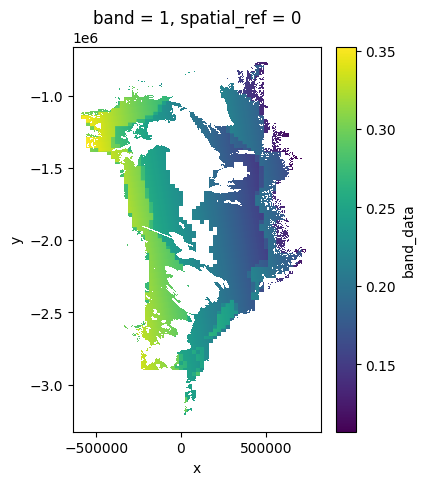

In [11]:
import xarray
import matplotlib.pyplot as plt

# test opening and plotting
test_data_tif = xarray.open_dataarray('test_delete.tif')
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
test_data_tif.plot(ax=axes)

plt.draw()